# PyData 2024 - Protein folding and what it means for drug discovery

First, you would probably have a hypothesis that a protein of interest was important in a pathway that affects a disease state. In this notebook, we focus on the Beta-1 Adrenoceptor. It's responsible for regulating the heart rate and heart tone, blocking the receptor slows the heart rate, and activating it speeds it up.

Further reading, https://karger.com/crd/article/122/2/104/77025/Beta-Adrenergic-Receptors-from-Their-Discovery-and

In [80]:
# Imports
import nglview as nv
from Bio.PDB import PDBParser
from IPython.display import IFrame, Image
import rdkit.Chem as Chem
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

default_size = {"width": 1024, "height": 768}

files_dir = Path().parent.resolve() / 'files'

## Do we have the experimentally calculated structure?

In [81]:
# Beta-1 adrenergic Receptor bound to a ligand P32
view = nv.show_pdbid("5f8u") # <-- fetches from the Protein Data Bank
# view.clear_representations()
# view.add_surface(selection="protein", opacity=0.8)
view

NGLWidget()

In [51]:
IFrame(
    "https://www.rcsb.org/search?request=%7B%22query%22%3A%7B%22type%22%3A%22group%22%2C%22nodes%22%3A%5B%7B%22type%22%3A%22group%22%2C%22nodes%22%3A%5B%7B%22type%22%3A%22group%22%2C%22nodes%22%3A%5B%7B%22type%22%3A%22terminal%22%2C%22service%22%3A%22full_text%22%2C%22parameters%22%3A%7B%22value%22%3A%22beta%20adrenoceptor%22%7D%7D%5D%2C%22logical_operator%22%3A%22and%22%7D%5D%2C%22logical_operator%22%3A%22and%22%2C%22label%22%3A%22full_text%22%7D%5D%2C%22logical_operator%22%3A%22and%22%7D%2C%22return_type%22%3A%22entry%22%2C%22request_options%22%3A%7B%22paginate%22%3A%7B%22start%22%3A0%2C%22rows%22%3A25%7D%2C%22results_content_type%22%3A%5B%22experimental%22%5D%2C%22sort%22%3A%5B%7B%22sort_by%22%3A%22score%22%2C%22direction%22%3A%22desc%22%7D%5D%2C%22scoring_strategy%22%3A%22combined%22%7D%2C%22request_info%22%3A%7B%22query_id%22%3A%22b19f73d07a1c3c3d0f082a68089d9b17%22%7D%7D",
    **default_size)

## What is the amino acid sequence?

Proteins are a chain of amino acids, each amino acid in a chain will dictates the 3-dimensional shape, some more than others depending on what makes up their R group. When an amino acid binds, it does that with it's "amino" and "carboxyl acid" groups, when they are bound we refer to them as "Amino acid residues".

Note, that genetic sequences map to amino acids so a particular gene encodes for a particular protein.

In [82]:
pdb_parser = PDBParser()
beta_1_structure = pdb_parser.get_structure("ADRB1_target", "files/ADRB1_target.pdbqt")

# Amino acid mappings for regular 3-letter aminos plus the prepared aminos like CYX
aa_mapping = {'CYS': 'C', 'CYX': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
              'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N',
              'GLY': 'G', 'HID': 'H', 'HIS': 'H', 'HIP': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W',
              'ALA': 'A', 'VAL': 'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}

residues = [residue.resname for residue in beta_1_structure.get_residues() if residue]
aa_sequence = [aa_mapping.get(r) for r in residues]

# The sequence of amino acid residues, following IUPAC conventions, https://www.bioinformatics.org/sms/iupac.html
"".join(aa_sequence)

'QWEAGMSLLMALVVLLIVAGNVLVIAAIGSTQRLQTLTNLFITSLACADLVVGLLVVPFGATLVVRGTWLWGSFLCELWTSLDVLCVTASIETLCVIAIDRYLAITSPFRYQSLMTRARAKVIICTVWAISALVSFLPIMMHWWRDEDPQALKCYQDPGCCDFVTNRAYAIASSIISFYIPLLIMIFVALRVYREAKEQIREHKALKTLGIIMGVFTLCWLPFFLVNIVNVFNRDLVPDWLFVAFNWLGYANSAMNPIIYCRSPDFRKAFKRLLAF'

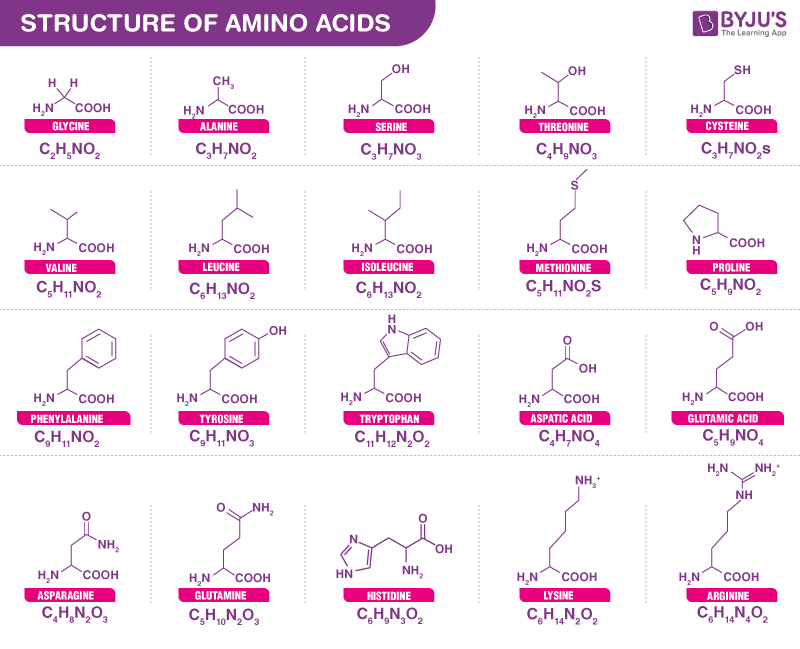

In [7]:
Image('files/amino_acids.png')

# Predicting the folded protein structure

## Want to run it yourself?

If you have the sequence of residues, or a gene of interest which you can get a sequence of amino acids from that. You enter that sequence 
into AlphaFold and have it predict the structure for you. To run AlphaFold 2 in their CoLab go to:

https://colab.research.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb

Alternatively, you can run it locally with ~2.2Tb of disk space, a docker image and an NVIDIA GPU.

https://github.com/google-deepmind/alphafold

## Predicting the structure Beta-1 Adrenergic receptor

Here, we've run the our beta adrenergic receptor on AlphaFold 3 (https://alphafoldserver.com/) it produces a predicted structure which is very similar if not practically identical to the original structure. In this particular case we _know_ the crystal structure from experimentation, but the point is that you can get the amino acid sequence from an expressed gene of interest or from a sequencing a protein using mass spectrometry or Edman degradation.

For more information on AlphaFold 3, see "Accurate structure prediction of biomolecular interactions with AlphaFold 3" (Abramson et al, https://www.nature.com/articles/s41586-024-07487-w).

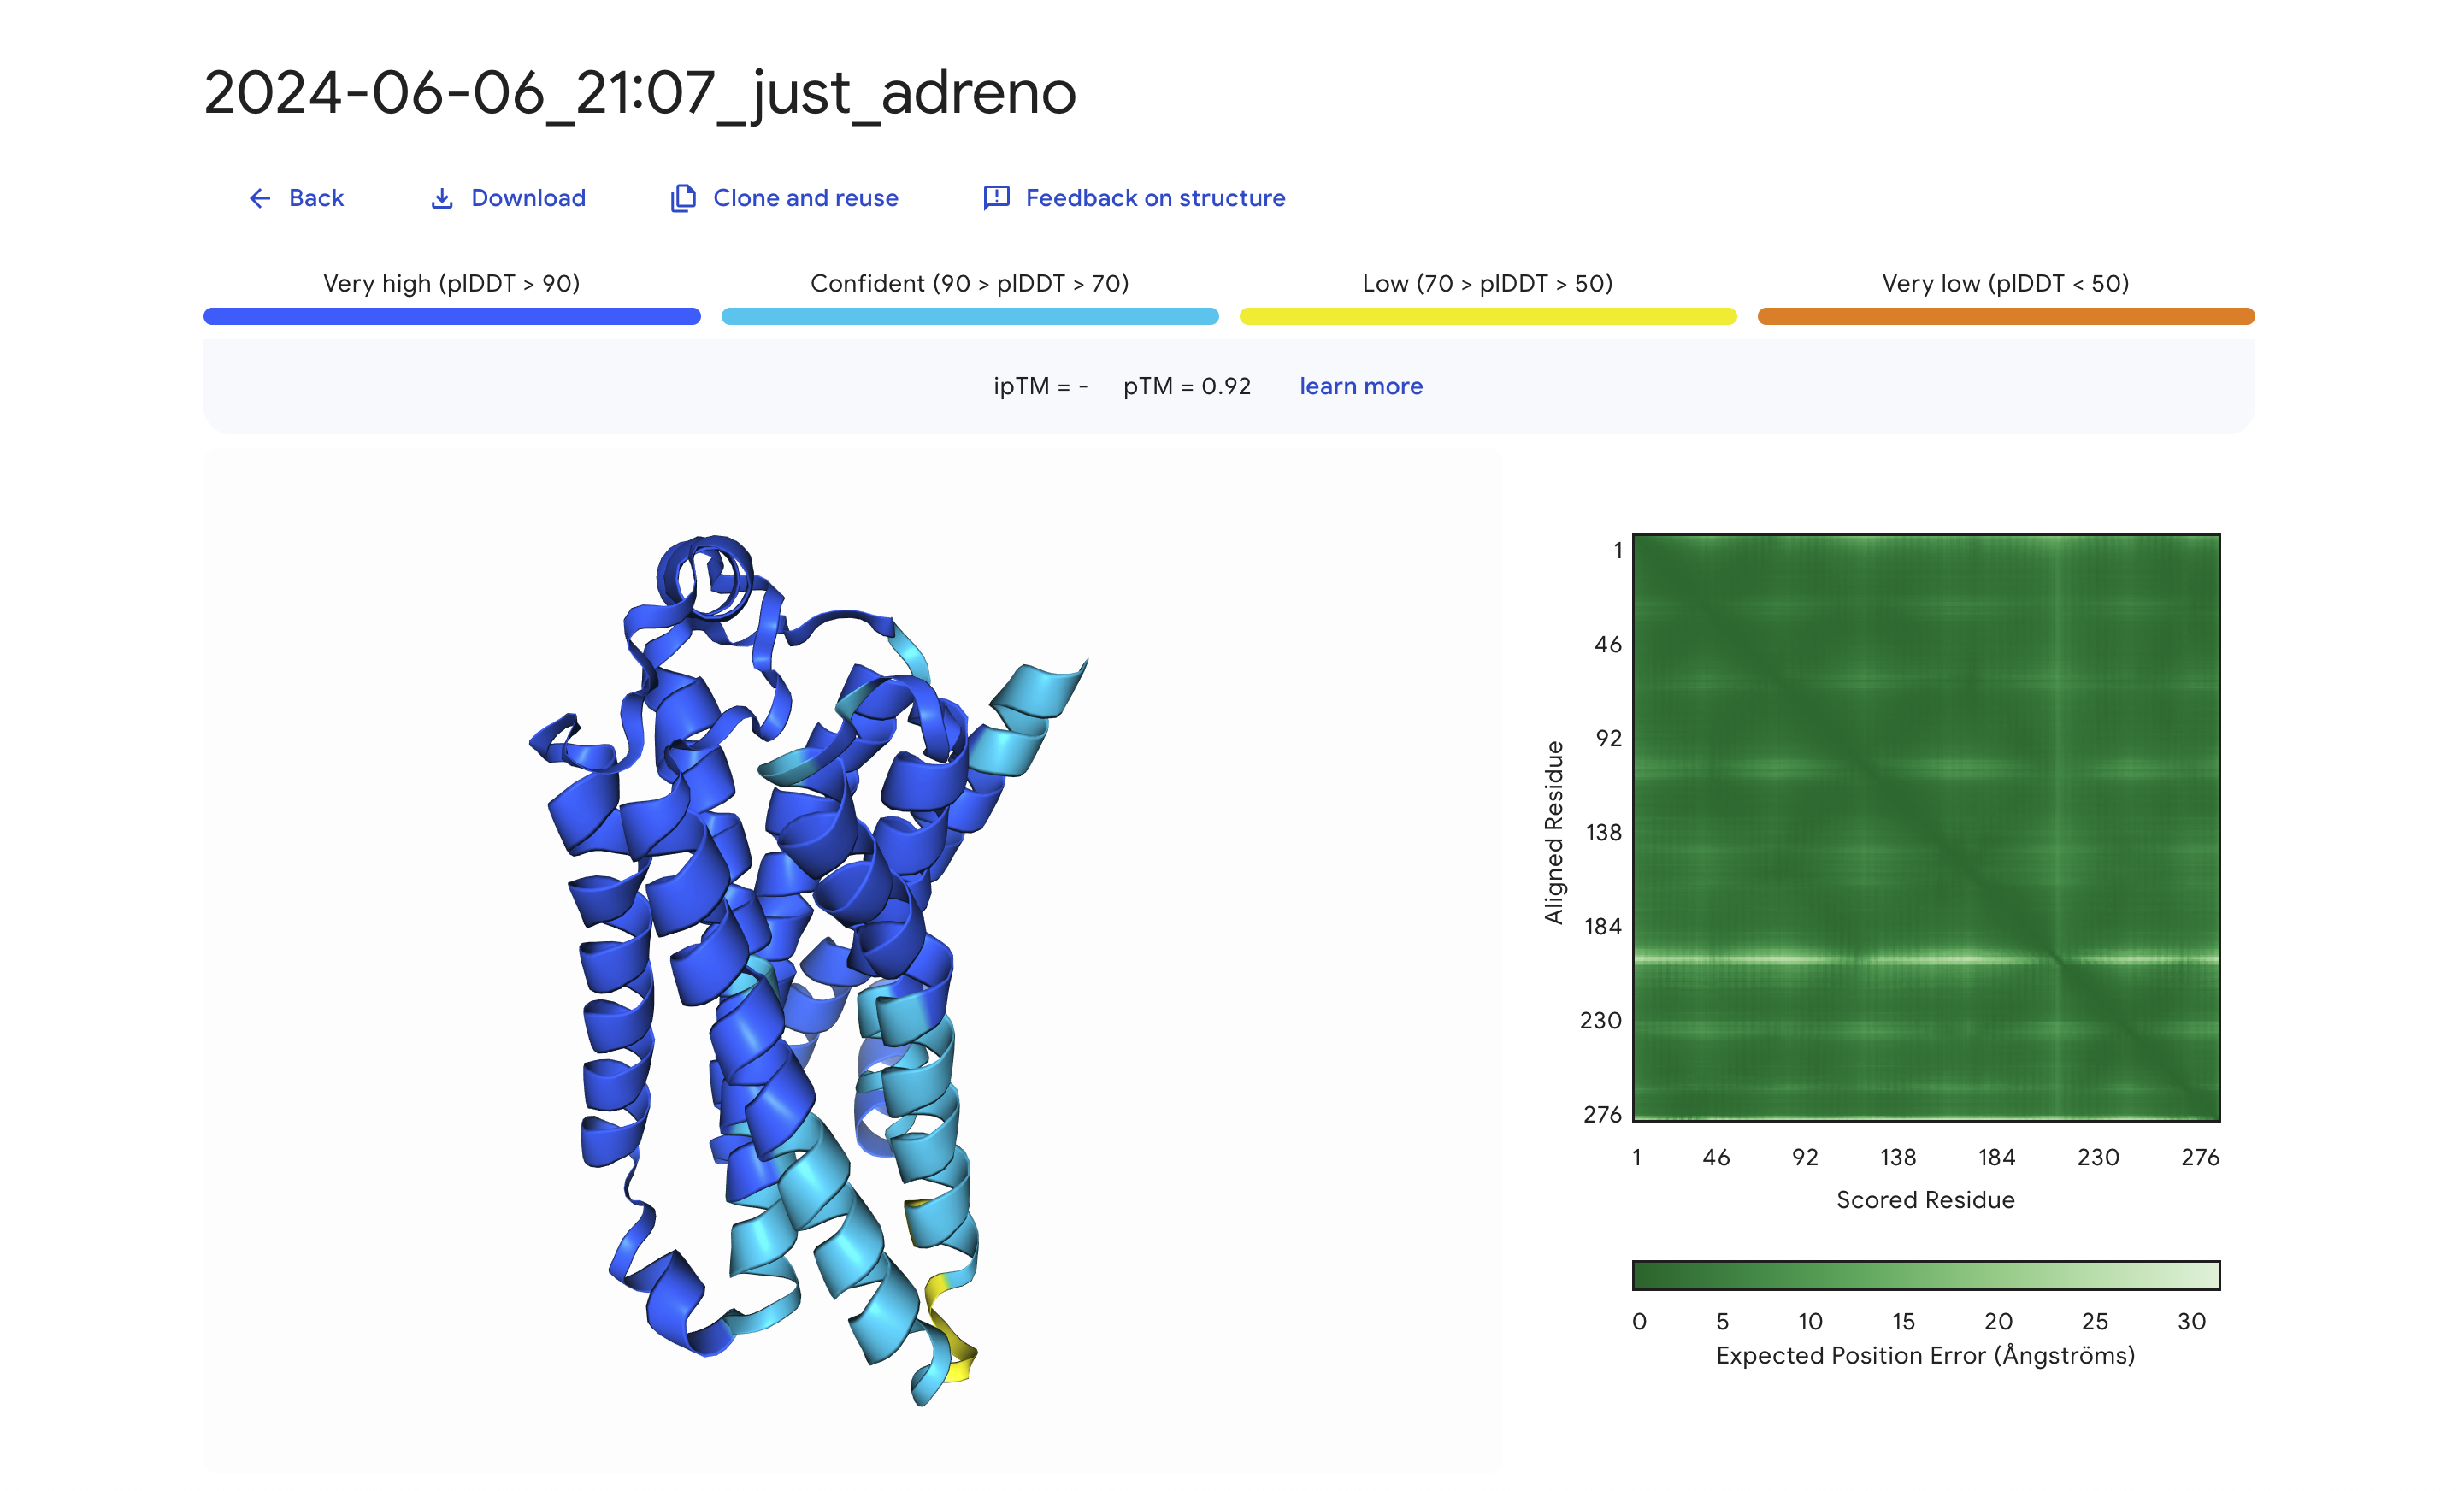

In [68]:
Image('files/alphafold_3_adbr1.png')

# What does are receptor interact with?

Here, we can use the string-db (https://string-db.org/) to find interactions with our protein Beta-2 Adrenoceptor 

In [53]:
IFrame('https://string-db.org/network/9606.ENSP00000358301', width=1024, height=768)

In [1]:
# Code lifted from https://github.com/tansel/deepmapper/blob/main/deepmapper_pytorch-TCGAData.ipynb
import requests
import pandas as pd

protein_list = ['ADRB1']
proteins = '%0d'.join(protein_list)
url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606'
r = requests.get(url)

# convert to dataframe using the first row as the column names; drop empty, final row 
lines = r.text.split('\n')  # pull the text from the response object and split based on new lines
data = [l.split('\t') for l in lines]  # split each line into its components based on tabs
df = pd.DataFrame(data[1:-1], columns=data[0])

interactions = df[['preferredName_A', 'preferredName_B', 'score']].sort_values(by=['score'], ascending=False)
interactions

,preferredName_A,preferredName_B,score
8,ADRB2,ARRB1,0.999
7,ADRB2,GNAS,0.993
15,GIP,GCG,0.982
22,ADRB1,GNAS,0.979
11,GNAI2,GNAI1,0.975
21,ADRB1,ARRB1,0.966
6,ADRB2,ADRB1,0.956
20,ADRB1,DLG4,0.953
5,ADRB2,GNAI1,0.949
4,ADRB2,GNAI2,0.948


## How can we determine if a drug binds to our receptor?

Here is the ligand that binds to beta-adrenoceptor — noradrenaline (https://pubchem.ncbi.nlm.nih.gov/compound/439260) — it's both a neurotransmitter and a hormone. It binds non-specifically to alpha-1, alpha-2, and beta-1 receptors.

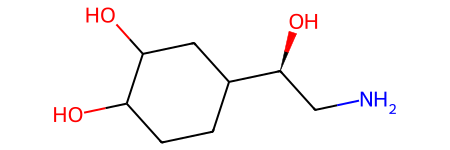

In [55]:
noradrenaline_smiles = 'C1CC(C(CC1[C@H](CN)O)O)O'
Chem.MolFromSmiles(noradrenaline_smiles)

Propranolol (https://pubchem.ncbi.nlm.nih.gov/compound/4946) is a nonselective, competitive antagonist to the beta-1 and beta-2 adrenoceptor. It's used for the treatment or prevention of cardiac arrhythmias.

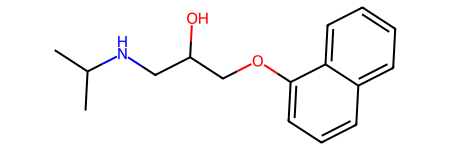

In [84]:
propranolol_smiles = 'CC(C)NCC(COC1=CC=CC2=CC=CC=C21)O'  # <-- Propranolol  
Chem.MolFromSmiles(propranolol_smiles)

In [64]:
IFrame("https://pubchem.ncbi.nlm.nih.gov/compound/4946", width=1024, height=400)

# We need to "pose" our chemical

We need to "pose" the chemical entity, to get it into the right shape in the receptor. Here we use dockstring (https://github.com/dockstring/dockstring) to find the best conformation to bind with our receptor which makes use of AutoDock Vina which uses a gradient-optimization conformational search, which...

> ... in the current implementation, the docking calculation consists of a number of independent runs, starting from random conformations. Each of these runs consists of a number of sequential steps. Each step involves a random perturbation of the conformation followed by a local optimization (using the Broyden-Fletcher-Goldfarb-Shanno algorithm) and a selection in which the step is either accepted or not. Each local optimization involves many evaluations of the scoring function as well as its derivatives in the position-orientation-torsions coordinates. The number of evaluations in a local optimization is guided by convergence and other criteria. The number of steps in a run is determined heuristically, depending on the size and flexibility of the ligand and the flexible side chains. However, the number of runs is set by the exhaustiveness parameter. Since the individual runs are executed in parallel, where appropriate, exhaustiveness also limits the parallelism. Unlike in AutoDock 4, in AutoDock Vina, each run can produce several results: promising intermediate results are remembered. These are merged, refined, clustered and sorted automatically to produce the final result. 

Source, https://github.com/ccsb-scripps/AutoDock-Vina

In [85]:
# García-Ortegón, Miguel, et al. "DOCKSTRING: easy molecular docking yields better benchmarks for ligand design." 
# Journal of Chemical Information and Modeling (2021).
from dockstring import load_target
from viewer import view_in_pymol

# The target ADRB1 has been prepared for binding by (THANK YOU DOCKSTRING folks!)
# * Removed water molecules
# * Kollman charges have been added (template values by each amino acid)
# * A search box has been added around the active site 
target = load_target('ADRB1')

# The score is measured kcal/mol — unit of energy density, more precisely energy number density 
# — see Gibb's Free Energy (https://en.wikipedia.org/wiki/Gibbs_free_energy)
noradrenaline_score, noradrenaline_aux = target.dock(noradrenaline_smiles)
noradrenaline_score

-6.1

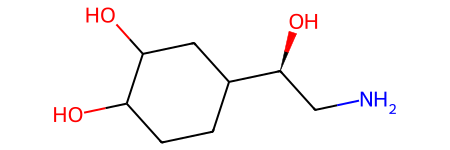

In [86]:
Chem.MolFromSmiles(noradrenaline_smiles)

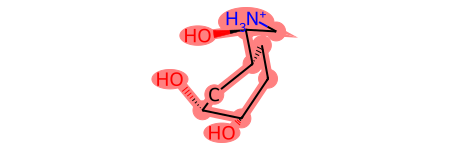

In [87]:
noradrenaline_aux['ligand']

In [88]:
view_in_pymol(
    'noradrenaline',
    target.pdbqt_path,
    target.conf_path,
    noradrenaline_aux['ligand']
)

<Popen: returncode: None args: ['pymol', PosixPath('/Users/emlynclay/Library...>

In [89]:
propranolol_score, propranolol_aux = target.dock(propranolol_smiles)
propranolol_score

-8.0

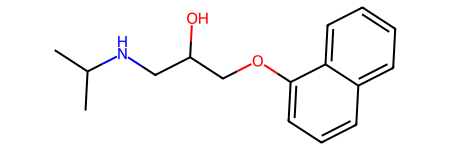

In [90]:
Chem.MolFromSmiles(propranolol_smiles)

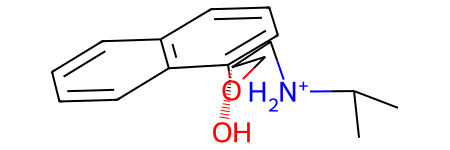

In [91]:
propranolol_aux['ligand']

In [92]:
view_in_pymol(
    'propranolol',
    target.pdbqt_path,
    target.conf_path,
    propranolol_aux['ligand']
)

<Popen: returncode: None args: ['pymol', PosixPath('/Users/emlynclay/Library...>

## What happens if we bind something else that doesn't bind to this receptor?

Let's try binding something we know doesn't bind to this receptor. Say, Simvastatin

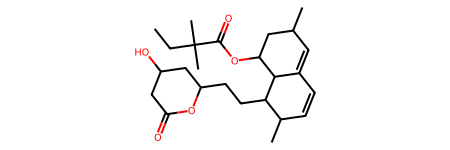

In [93]:
simva_smiles = 'CCC(C)(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC(=O)O3)O)C'  # <-- Simvastatin  
Chem.MolFromSmiles(simva_smiles)

In [94]:
simva_score, simva_aux = target.dock(simva_smiles)
simva_score

-8.5

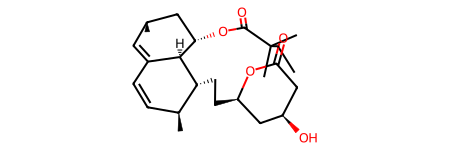

In [76]:
simva_aux['ligand']

In [95]:
view_in_pymol(
    'simvastatin',
    target.pdbqt_path,
    target.conf_path,
    simva_aux['ligand']
)

<Popen: returncode: None args: ['pymol', PosixPath('/Users/emlynclay/Library...>

## Visualising them altogether

In [96]:
from subprocess import Popen, DEVNULL, STDOUT
from pathlib import Path
from dockstring.utils import get_resources_dir

resources_dir = get_resources_dir()
target = resources_dir / 'targets/ADRB1_target.pdbqt'
view_search_box = resources_dir / 'view_search_box.py'

command = ['pymol', target, view_search_box, files_dir / 'all_ligands_bound.pse']

Popen(command, stdout=DEVNULL, stderr=STDOUT)

<Popen: returncode: None args: ['pymol', PosixPath('/Users/emlynclay/Library...>